In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np


W tym mini projekcie za pomocą danych ze strony kaggle dokonuje analizy na grupie studentów która oceniała (wszystko co jest w tytule kolumn) w skali 1-30

In [9]:
df = pd.read_csv('StressLevelDataset.csv')
df.head(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


Podstawowe statystyki policzone za pomocą biblioteki numpy

In [10]:

#UŻYĆ TUTAJ NUMPY

average_anxiety_lvl = df['anxiety_level'].mean()
print(average_anxiety_lvl)
m_h_h = df['mental_health_history'].count()
#print(df.describe())

11.063636363636364


Poodział czynników na kategorie:

In [4]:

psychological_factors = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']]
factors2 = df[['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']]
environmental_factors = df[['noise_level', 'living_conditions', 'safety', 'basic_needs']]
social_factors = df[['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']]


Mapa korelacji dla poszczegoólnych kolumn

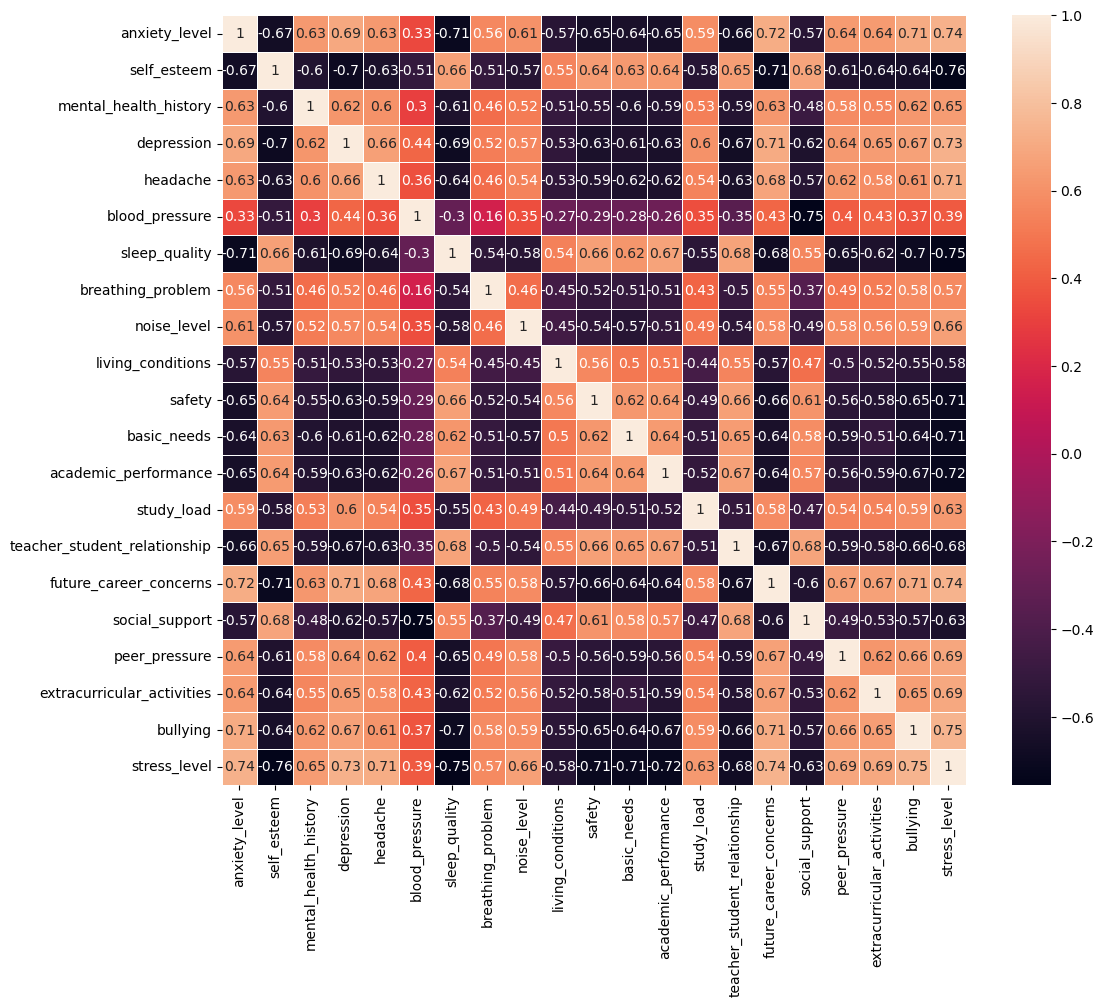

In [5]:
#=================================================================psychological factors CORRELATION
#print(psychological_factors)
#=============================CORRELATION
matrix_correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(matrix_correlation, annot=True, linewidth=.7)
plt.show()


Podział studentów na grupy według oceny swojej pewności siebie

19.0


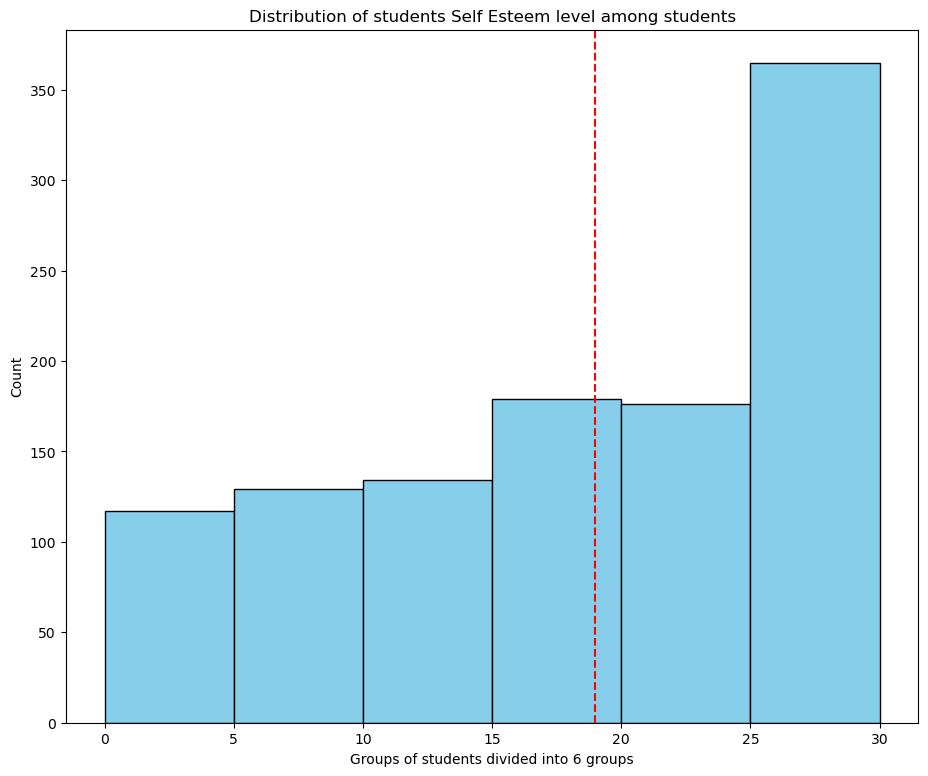

In [6]:
bins = [0, 5, 10, 15 , 20, 25, 30]
average_selfesteem = psychological_factors['self_esteem'].median()
print(average_selfesteem)
plt.figure(figsize=(11, 9))
plt.hist(psychological_factors['self_esteem'], bins=bins, color= 'skyblue' , edgecolor='black')
plt.axvline(average_selfesteem, color='red', linestyle='--')
plt.title('Distribution of students Self Esteem level among students')
plt.xlabel('Groups of students divided into 6 groups')
plt.ylabel('Count')
plt.show()

Prosty diagram kołowy pokazujący podział na ludzie z depresją i bez wśród studentów

C:\Users\Hubert Domagala\AppData\Local\Temp\ipykernel_9416\2854808145.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  depresion_yes = df[df['depression'] == 1].count()[0]
C:\Users\Hubert Domagala\AppData\Local\Temp\ipykernel_9416\2854808145.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  depresion_no = df[df['depression'] == 0].count()[0]#to zero keruje w chuj


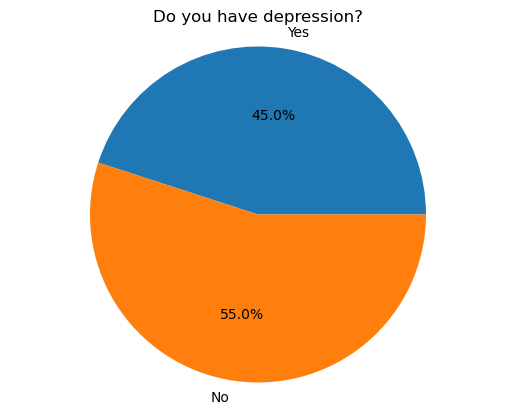

In [7]:
depresion_yes = df[df['depression'] == 1].count()[0]
depresion_no = df[df['depression'] == 0].count()[0]

plt.pie([depresion_yes, depresion_no], labels = ['Yes', 'No'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Do you have depression?')
plt.show()